<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week9/Day3/W9D3_XC_XP_minip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project : Sentiment Analysis with Random Forest Classifier

## Project Overview
In this mini project, we will perform sentiment analysis on a dataset using a Random Forest Classifier.
Sentiment analysis involves determining the sentiment or emotion expressed in a text, such as positive, negative, or neutral.
We will train a machine learning model to predict sentiment based on text data.

## What you will learn

- Data preprocessing techniques for text data.
- Training a machine learning model for sentiment analysis.
- Hyperparameter tuning using GridSearchCV, RandomSearchCV, and Bayesian optimization.
- Comparing model performance across different hyperparameter tuning methods.
- Model evaluation using various metrics.


## Preparation

- Have a notebook prepared


## Dataset

We will use the dataset which is available on Kaggle for sentiment analysis, which consists of a sentence and its respective sentiment as a target variable.
This dataset contains 3 separate files named train.txt, test.txt and val.txt.
You can find the dataset [here](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

## Task

- import the necessary libraries.
- Read the training data and validation data, create the data frame with read_csv().
- Check for the various target labels using seaborn
- Preprocess the data to get rid of any characters apart from alphabets, convert the string to lowercase, check for stopwords in the data and get rid of them and perform lemmatization on each word.
- Use Random Forest Classifier to train your data.
- Tune the model hyperparameters using GridSearchCV, RandomSearchCV, and Bayesian optimization. Document the configurations and results of each method.
- Read and preprocess the test data similarly to the training data.
- Evaluate the model on the test data using metrics like Accuracy Score, Precision Score, Recall Score, and Confusion Matrix. Create a ROC curve for visual evaluation.
- Compare the performance of the model with different hyperparameter tuning methods and determine the most effective approach.

to learn more about which hyperparameters tuning method to pick : https://towardsdatascience.com/how-to-optimize-hyperparameters-of-machine-learning-models-98baec703593

### Submit your Daily Challenge :

Don’t forget to push to GitHub

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,  GridSearchCV,  RandomizedSearchCV
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint




In [16]:
test = pd.read_csv('test.txt', sep=';', header=None)
test.columns = ['text','emotion']
val = pd.read_csv('val.txt', sep=';', header=None)
val.columns = ['text','emotion']

df = pd.read_csv('train.txt', sep=';', header=None)
df.columns = ['text','emotion']
df

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


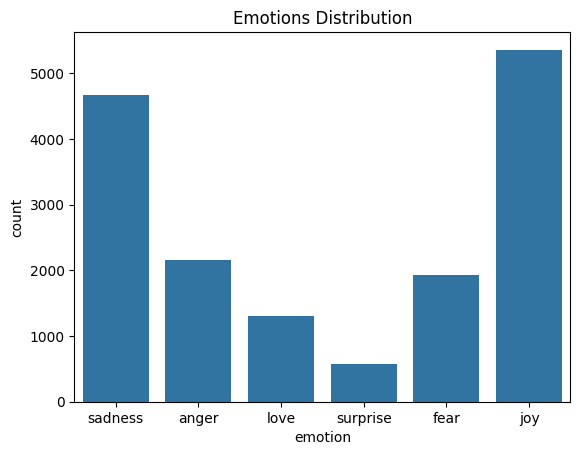

In [17]:
sns.countplot(x='emotion', data=df)
plt.title('Emotions Distribution')
plt.show()

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#Data preprocessing for train data
for index, row in df.iterrows():
    text = re.sub("[^a-zA-Z]", " ", row['text'])
    text = text.lower()

    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    processed_text = " ".join(words)
    df.at[index, 'pretext'] = processed_text

#Data preprocessing for validatuion data
for index, row in val.iterrows():
    text = re.sub("[^a-zA-Z]", " ", row['text'])
    text = text.lower()

    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    processed_text = " ".join(words)
    val.at[index, 'pretext'] = processed_text

#Data preprocessing for test data
for index, row in test.iterrows():
    text = re.sub("[^a-zA-Z]", " ", row['text'])
    text = text.lower()

    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    processed_text = " ".join(words)
    test.at[index, 'pretext'] = processed_text



In [32]:
df

,text,emotion,pretext
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,turning feel pathetic still waiting table subb...
15997,i feel strong and good overall,joy,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,feel like rude comment im glad


In [33]:


tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(df['pretext'])
X_test = tfidf_vectorizer.transform(val['pretext'])



y_test = val['emotion']

#prediction
y_train = df['emotion']

#Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("\nMetrics:\n", classification_report(y_test, y_pred))


accuracy_score: 0.8895

Metrics:
               precision    recall  f1-score   support

       anger       0.89      0.88      0.88       275
        fear       0.83      0.84      0.83       212
         joy       0.90      0.93      0.91       704
        love       0.86      0.77      0.81       178
     sadness       0.91      0.92      0.92       550
    surprise       0.85      0.77      0.81        81

    accuracy                           0.89      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.89      0.89      0.89      2000



# Tune the model hyperparameters using GridSearchCV

In [36]:

param_grid = {
    'n_estimators': [80, 100],
    'max_features': ['sqrt'],
    'max_depth': [10, None],
    'min_samples_split': [13, 15],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=2, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best result:", grid_search.best_score_)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
Best result: 0.869625


In [38]:

param_grid = {
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'max_depth': [None],
    'min_samples_split': [25],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best result:", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 200}
Best result: 0.8785000000000001



Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}
Best result: 0.86525



Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 50}
Best result: 0.8675625

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
Best result: 0.869625

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 200}
Best result: 0.8785000000000001

# Tune the model hyperparameters using RandomSearchCV

In [25]:
param_dist = {
    'n_estimators': sp_randint(100, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2, 4, None],
    'min_samples_split': sp_randint(2, 5),
    'min_samples_leaf': sp_randint(1, 3)
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=2, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best result:", random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 161}
Best result: 0.8688125


# Evaluate the model on the test data

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Vectorize the test data using the same vectorizer as the one used for training
X_test = tfidf_vectorizer.transform(test['pretext'])


# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(test['emotion'], predictions)
precision = precision_score(test['emotion'], predictions, average='weighted')
recall = recall_score(test['emotion'], predictions, average='weighted')
conf_matrix = confusion_matrix(test['emotion'], predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8860
Precision: 0.8843
Recall: 0.8860
Confusion Matrix:
[[246   6  10   1  11   1]
 [ 11 192   0   0  14   7]
 [  4   5 644  26   9   7]
 [  3   0  39 114   1   2]
 [ 13   5  17   5 539   2]
 [  1  14  13   0   1  37]]


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Vectorize the test data using the same vectorizer as the one used for training
X_test = tfidf_vectorizer.transform(test['pretext'])


# Make predictions on the test set
# predictions = rf_classifier.predict(X_test)
predictions = grid_search.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(test['emotion'], predictions)
precision = precision_score(test['emotion'], predictions, average='weighted')
recall = recall_score(test['emotion'], predictions, average='weighted')
conf_matrix = confusion_matrix(test['emotion'], predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8885
Precision: 0.8872
Recall: 0.8885
Confusion Matrix:
[[246   6  12   1   9   1]
 [  7 199   0   0  11   7]
 [  5   5 650  20   9   6]
 [  2   0  44 110   1   2]
 [ 12   7  20   5 535   2]
 [  1  15  13   0   0  37]]


In [40]:
X_test = tfidf_vectorizer.transform(test['pretext'])


# predictions = rf_classifier.predict(X_test)
predictions = random_search.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(test['emotion'], predictions)
precision = precision_score(test['emotion'], predictions, average='weighted')
recall = recall_score(test['emotion'], predictions, average='weighted')
conf_matrix = confusion_matrix(test['emotion'], predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8875
Precision: 0.8860
Recall: 0.8875
Confusion Matrix:
[[241   7  14   1  11   1]
 [  8 196   1   0  13   6]
 [  4   5 648  24   9   5]
 [  2   0  44 110   1   2]
 [ 11   4  18   5 541   2]
 [  1  14  12   0   0  39]]


# Create a ROC curve for visual evaluation.

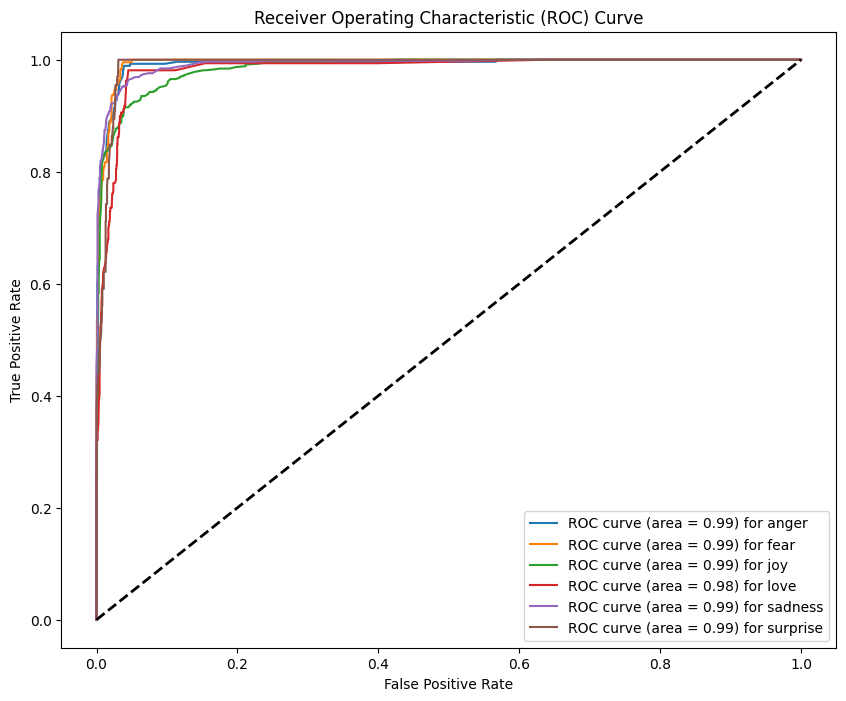

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = rf_classifier.predict_proba(X_test)

y_test_bin = label_binarize(test['emotion'], classes=rf_classifier.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(rf_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(len(rf_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {rf_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The best model is Random Forrest with hypertuning with Grid Search